In [2]:
import sys
import numpy as np
import scipy as sc
import os
import argparse
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
from random import randint
from array import *
import fileinput
import itertools
import linecache
from itertools import islice
from scipy.spatial import distance
from scipy.stats.stats import pearsonr
from scipy import stats
from scipy import signal
from scipy.ndimage.filters import gaussian_filter
import random
import pandas as pd
#import seaborn as sn
%matplotlib inline
from numpy import linalg as LA

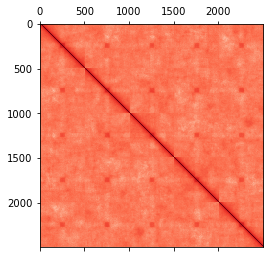

In [4]:
file_map = "../data/Five-chromosomes/HiC/HiC-LvS-five-chr-500-0.0-XX/Dist-LvS-five-chr-500-0.0-0.25-0.05-0.05-all.dat"
C1 = np.genfromtxt(file_map)
C1[np.isinf(C1)]= 0.0
C1[np.isnan(C1)]= 0.0
#C0=np.genfromtxt("../data/hic-maps-GM12878-chr20/Dist-LvS-GM12878-chr20-0.05-0.05-all.dat")
#C0[np.isinf(C0)]= 0.0
#C0[np.isnan(C0)]= 0.0
#Cp=C1-C0
plt.matshow(C1,norm=mpl.colors.LogNorm(vmin=1e-5, vmax=1),cmap="Reds")

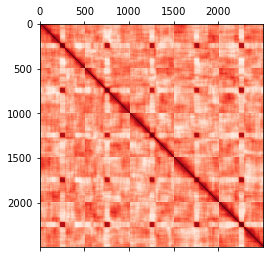

In [5]:
MC1 = np.zeros(np.shape(C1))
for i in range(0,np.shape(C1)[0]):
    MC1+= np.diagflat(np.diag(C1,k=i)/np.nanmean(np.diag(C1,k=i)),i)
MC1=MC1.T+np.triu(MC1,1)
dC1 = pd.DataFrame(MC1)
#axs[0].matshow(dC1,norm=mpl.colors.LogNorm(vmin=1e-1, vmax=2),cmap="Reds")
cmC1 = dC1.corr()
plt.matshow(cmC1,cmap="Reds")

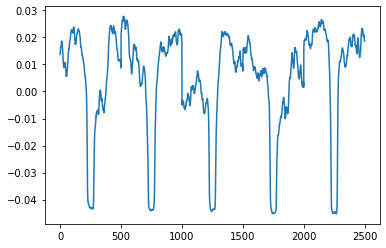

In [6]:
np.fill_diagonal(cmC1.values,0.0)
eig_vals, eig_vecs = LA.eig(cmC1)
plt.plot(eig_vecs[:,0])

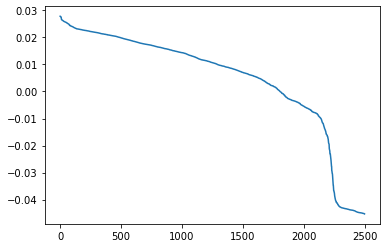

In [7]:
sort_eig_vecs=list(eig_vecs[:,0])
sort_eig_vecs.sort(key = lambda s: float(s),reverse=True)
plt.plot(sort_eig_vecs)

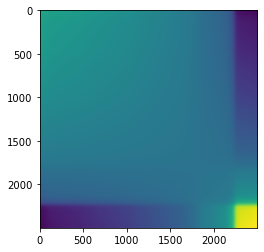

In [9]:
saddle=np.outer(sort_eig_vecs, sort_eig_vecs)
snmin=saddle.min()
snmax=saddle.max()
plt.imshow(saddle,vmin=snmin,vmax=snmax)

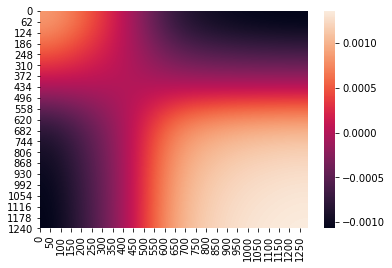

In [16]:
saddle_smooth = gaussian_filter(saddle, sigma=100)
sn.heatmap(saddle_smooth)
